In [65]:
import numpy as np  
import pandas as pd 
from PIL import Image 

df = pd.read_csv('Topic_Survey_Assignment.csv', index_col=0)
df = df/22.33
df.head(6)


,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),59.650694,32.646664,5.687416
Data Analysis / Statistics,75.593372,19.883565,2.686968
Data Journalism,19.211823,48.410210,27.317510
Data Visualization,60.008957,32.870578,4.567846
Deep Learning,56.560681,34.482759,6.090461
Machine Learning,72.951187,21.361397,3.313927


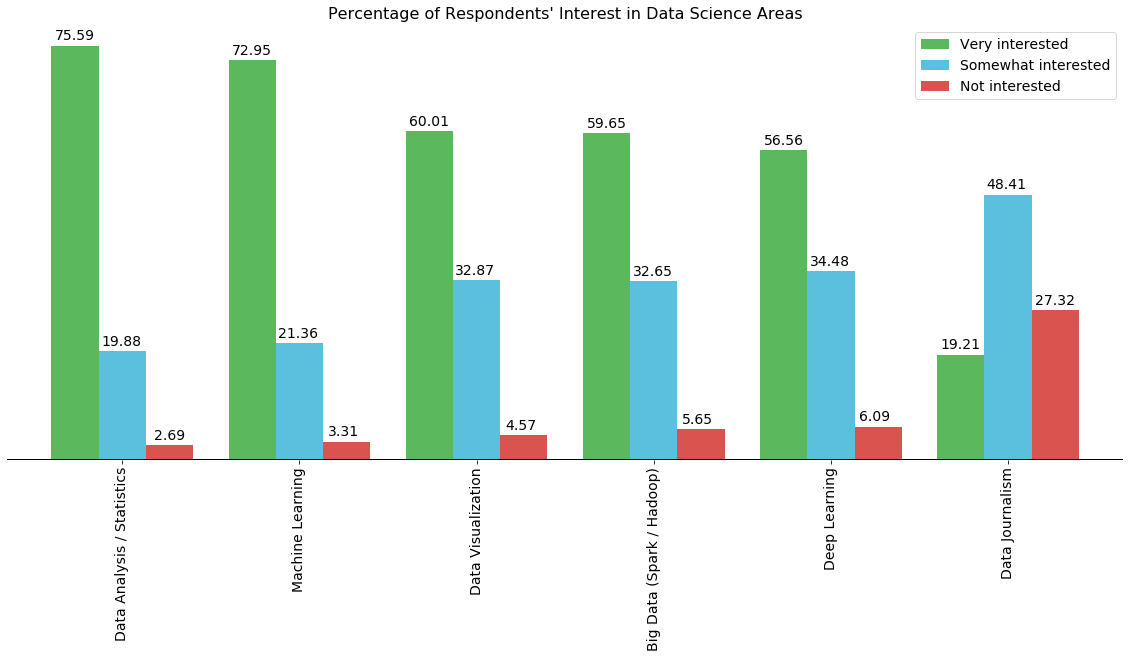

In [71]:
import matplotlib as mpl
import matplotlib.pyplot as plt

df.sort_values(by=['Very interested'], inplace=True, ascending=False)
#df = df/22.33 #takes the percentage considering a total of 2233
df.plot(kind='bar', figsize=(20,8), color=['#5cb85c', '#5bc0de', '#d9534f'], width=0.8, fontsize=14)
plt.title("Percentage of Respondents' Interest in Data Science Areas", fontsize=16)
plt.legend(loc=1, fontsize=14)
for spine in plt.gca().spines.values(): #remove all axes
    spine.set_visible(False)
plt.yticks([])
plt.arrow(-2,0,10,0) #draw horizontal axis

plt.text(-0.38,76.59,"75.59",fontsize=14)
plt.text(-0.12,20.88,"19.88",fontsize=14)
plt.text(0.18,3.69,"2.69",fontsize=14)

plt.text(0.62,73.95,"72.95",fontsize=14)
plt.text(0.88,22.36,"21.36",fontsize=14)
plt.text(1.16,4.31,"3.31",fontsize=14)

plt.text(1.62,61.01,"60.01",fontsize=14)
plt.text(1.88,33.87,"32.87",fontsize=14)
plt.text(2.16,5.57,"4.57",fontsize=14)


plt.text(2.62,60.65,"59.65",fontsize=14)
plt.text(2.88,33.65,"32.65",fontsize=14)
plt.text(3.16,6.65,"5.65",fontsize=14)


plt.text(3.62,57.56,"56.56",fontsize=14)
plt.text(3.88,35.48,"34.48",fontsize=14)
plt.text(4.16,7.09,"6.09",fontsize=14)


plt.text(4.62,20.21,"19.21",fontsize=14)
plt.text(4.88,49.41,"48.41",fontsize=14)
plt.text(5.15,28.32,"27.32",fontsize=14)


plt.show()


In [2]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.2

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge

The following packages will be UPDATED:

    certifi: 2019.11.28-py36_0 anaconda --> 2019.11.28-py36_0 conda-forge

The following packages will be DOWNGRADED:

    openssl: 1.1.1-h7b6447c_0  anaconda --> 1.1.1d-h516909a_0 conda-forge


certifi-2019.11.28   | 149 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Folium installed and imported!


In [2]:
### type your answer here

# define the world map centered around Mexico with a higher zoom level
world_map = folium.Map(location=[19.428, -99.35], zoom_start=4)

# display world map
world_map



In [11]:
import pandas as pd
import numpy as np

df_incidents = pd.read_csv('https://cocl.us/sanfran_crime_dataset')

print('Dataset downloaded and read into a pandas dataframe!')
df_incidents.head()


Dataset downloaded and read into a pandas dataframe!


,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [ ]:
df_incidents.shape

In [ ]:
df_incidents["PdDistrict"].value_counts()

In [1]:
sanfran_map = folium.Map(location=[37.77, -122.42], zoom_start=12)
sanfran_map

# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='YlOrRd',
            fill_opacity=0.7,
            line_opacity=0.2
        )
    )

# add incidents to map
sanfran_map.add_child(incidents)

NameError: name 'folium' is not defined

In [ ]:
df_incidents.shape